<a href="https://colab.research.google.com/github/Panperception/SCC022/blob/main/Week01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload the data files and the setup file from your local disk to the folder in the left (click on the folder button to see)
### Files needed:
 1. disease-cases.csv
 2. NOTT_2015.csv
 3. requirements.txt



## Install requirements


In [48]:
!pip install -r requirements.txt

## Initialization

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
plt.interactive(True)
cvd = pd.read_csv("disease-cases.csv")


## Solution 1 - Demo Code

#### 1. Statics on the whole dataset

In [50]:
cvd


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
0,E06000003,Redcar and Cleveland,ltla,01/02/2022,94
1,E07000040,East Devon,ltla,01/02/2022,176
...,...,...,...,...,...
264588,E09000017,Hillingdon,ltla,03/03/2020,0
264589,E09000017,Hillingdon,ltla,02/03/2020,1


In [51]:
pd.options.display.max_rows = 10
pd.options.display.min_rows = 5
cvd


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
0,E06000003,Redcar and Cleveland,ltla,01/02/2022,94
1,E07000040,East Devon,ltla,01/02/2022,176
...,...,...,...,...,...
264588,E09000017,Hillingdon,ltla,03/03/2020,0
264589,E09000017,Hillingdon,ltla,02/03/2020,1


In [52]:
cvd['Specimen date'] = pd.to_datetime(cvd['Specimen date'], dayfirst=True)
cvd


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
0,E06000003,Redcar and Cleveland,ltla,2022-02-01,94
1,E07000040,East Devon,ltla,2022-02-01,176
...,...,...,...,...,...
264588,E09000017,Hillingdon,ltla,2020-03-03,0
264589,E09000017,Hillingdon,ltla,2020-03-02,1


In [53]:
cvd.describe()

,Specimen date,Daily lab-confirmed cases
count,264590,264590.000000
mean,2021-02-18 04:16:15.601496832,65.576004
min,2020-01-11 00:00:00,0.000000
25%,2020-08-28 00:00:00,4.000000
50%,2021-02-18 00:00:00,21.000000
75%,2021-08-11 00:00:00,76.000000
max,2022-02-01 00:00:00,4303.000000
std,NaN,130.395361


<Axes: xlabel='Specimen date'>

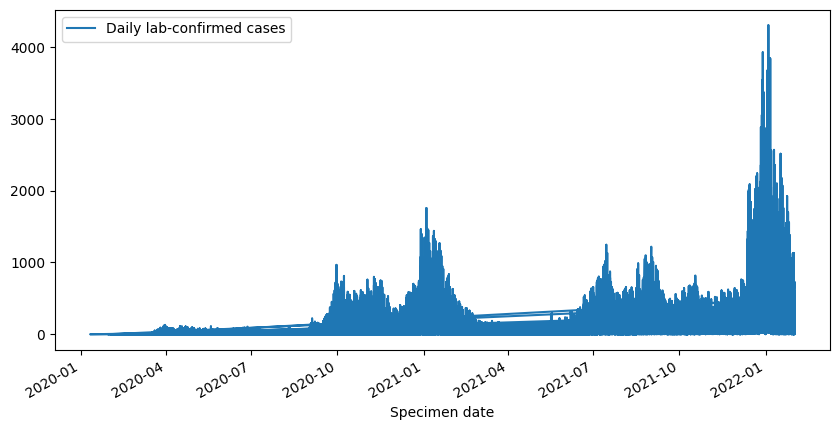

In [54]:
cvd.plot(x="Specimen date", y="Daily lab-confirmed cases", figsize=(10, 5))

#### Check samples from London area

In [55]:
cvd_london = cvd[cvd['Area name'] == 'London']
cvd_london

,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
176161,E09000012,London,ltla,2022-02-01,134
176174,E09000012,London,ltla,2022-01-31,281
...,...,...,...,...,...
186576,E09000012,London,ltla,2020-03-07,0
186584,E09000012,London,ltla,2020-03-06,1


<Axes: xlabel='Specimen date'>

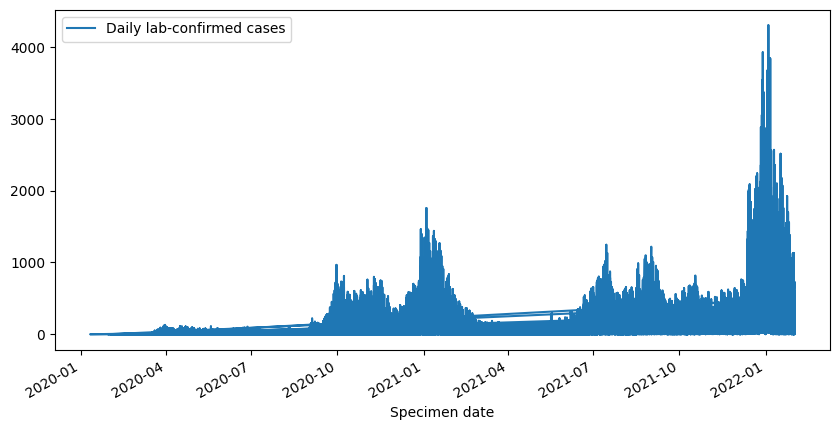

In [56]:
cvd.plot(x="Specimen date", y="Daily lab-confirmed cases", figsize=(10, 5))


In [57]:
cvd_london = cvd_london.sort_values(by='Specimen date')
cvd_london


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
186584,E09000012,London,ltla,2020-03-06,1
186576,E09000012,London,ltla,2020-03-07,0
...,...,...,...,...,...
176174,E09000012,London,ltla,2022-01-31,281
176161,E09000012,London,ltla,2022-02-01,134


<Axes: xlabel='Specimen date'>

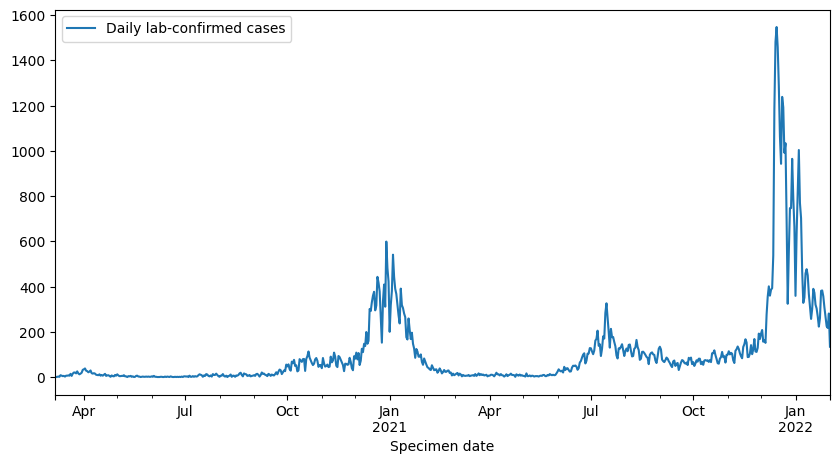

In [58]:
cvd_london.plot(x="Specimen date", y="Daily lab-confirmed cases", figsize=(10, 5))

#### 3. Compare London and Lancaster

In [59]:
cvd_lancaster = cvd[cvd['Area name'] == 'Lancaster']
cvd_lancaster = cvd_lancaster.sort_values(by='Specimen date')
cvd_lancaster


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
134309,E07000121,Lancaster,ltla,2020-03-16,5
134295,E07000121,Lancaster,ltla,2020-03-17,1
...,...,...,...,...,...
124021,E07000121,Lancaster,ltla,2022-01-31,184
124009,E07000121,Lancaster,ltla,2022-02-01,107


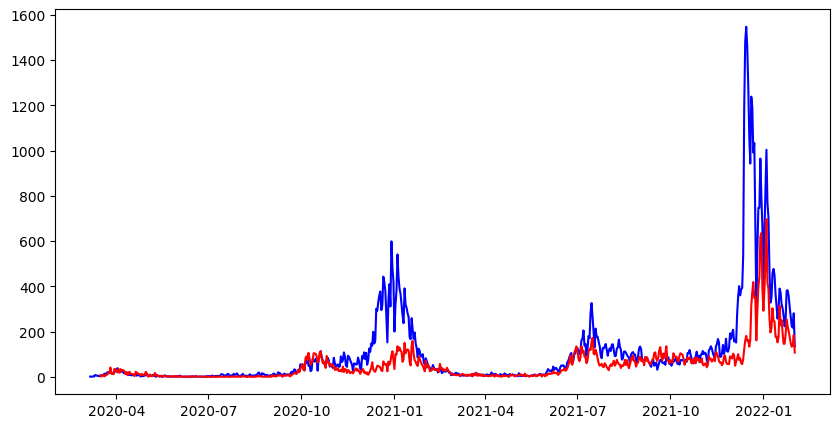

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(cvd_london["Specimen date"], cvd_london["Daily lab-confirmed cases"], 'b')
plt.plot(cvd_lancaster["Specimen date"], cvd_lancaster["Daily lab-confirmed cases"], 'r')
plt.show()


## Solution 2 - Demo Code

<Axes: xlabel='pm2', ylabel='oz'>

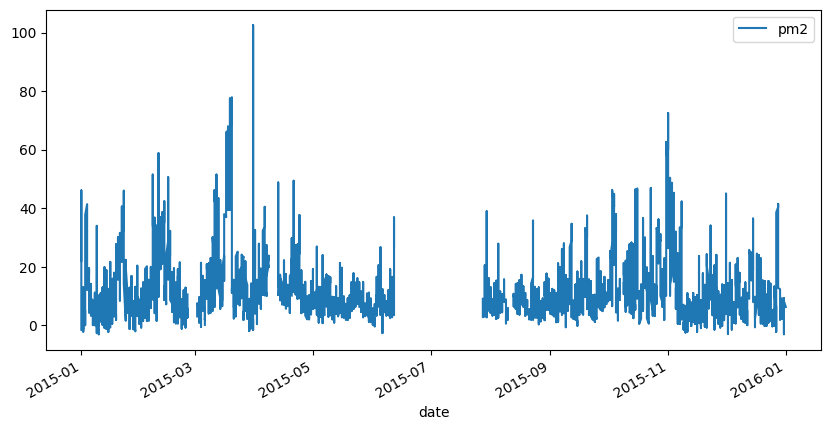

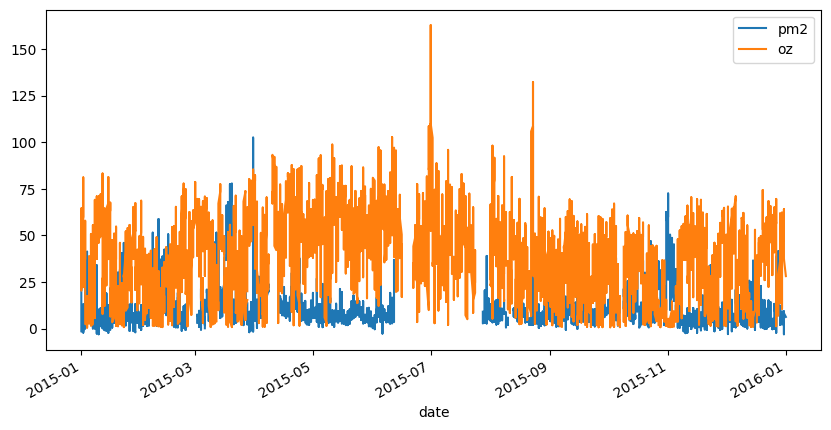

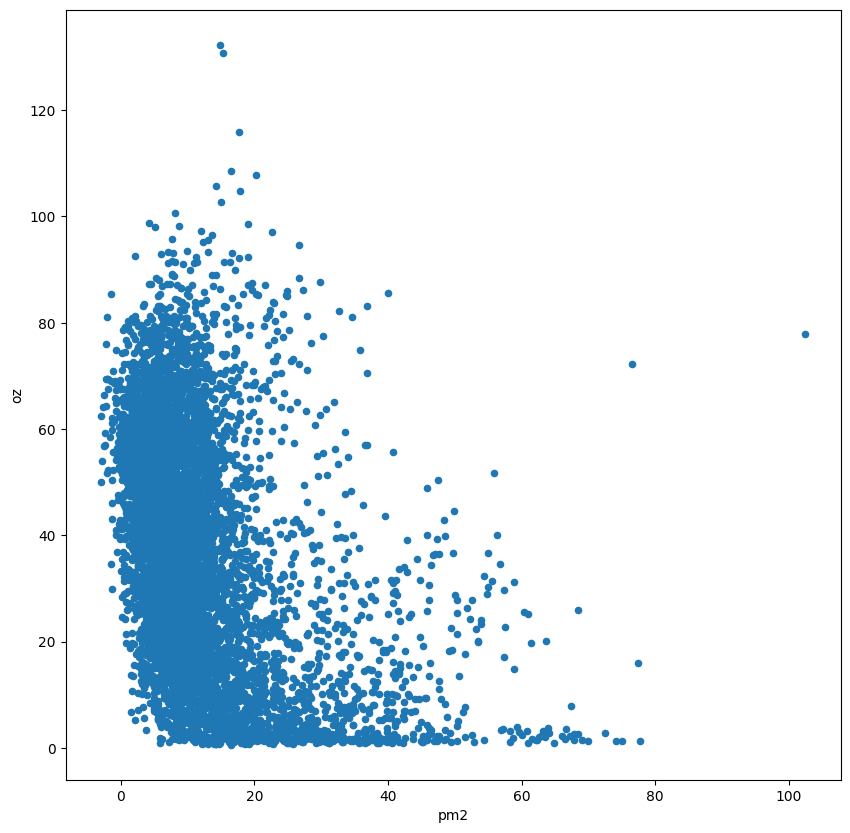

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
plt.interactive(True)

nott = pd.read_csv("NOTT_2015.csv", header=4)
nott

pd.options.display.max_rows = 10
pd.options.display.min_rows = 5
pd.options.display.max_columns = 10
nott

list(nott.columns)

nott = nott.drop("unit", axis=1)
nott

nott = nott.drop(nott.filter(regex="unit*"), axis=1)
nott = nott.drop(nott.filter(regex="status*"), axis=1)
nott

nott.columns = ['date', 'time', 'pm10', 'no', 'no2', 'n_as_no2', 'nv_pm10', 'nv_pm2', 'oz', 'pm2', 'so2', 'v_pm10', 'v_pm2']

list(nott.columns)

nott['date'] = pd.to_datetime(nott['date'], dayfirst=True)

nott.loc[nott['time']=="24:00", "date"] = nott['date'] + dt.timedelta(days=1)
nott

nott.loc[nott['time']=="24:00", 'time'] = pd.to_datetime("00:00", format="%H:%M").time()
nott

nott.describe()

nott.plot(x="date", y="pm2", figsize=(10, 5))

nott.plot(x="date", y=["pm2", "oz"], figsize=(10, 5))

nott.plot(kind="scatter", x="pm2", y="oz", figsize=(10, 10))

